In [1]:
# Import Libraries
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Import data

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle = True)

tensor(6)


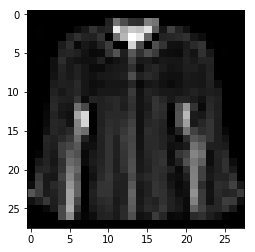

In [3]:
# Look at the data

images, labels = next(iter(trainloader))

print(labels[0])
plt.imshow(images[0].view(28,28), cmap = 'Greys_r')

In [4]:
# Define a NN architecture
n_hidden = [128,64]
n_output = 10

model = nn.Sequential(nn.Linear(784, n_hidden[0]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[0],n_hidden[1]),
                     nn.ReLU(),
                     nn.Linear(n_hidden[1],n_output),
                     nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [5]:
# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
# Set up training loop

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss
        optimizer.step()
    else:
        print(f'Loss for epoch {e}: {running_loss/len(trainloader)}')

Loss for epoch 0: 0.5476047396659851
Loss for epoch 1: 0.44918888807296753
Loss for epoch 2: 0.4185180366039276
Loss for epoch 3: 0.40280619263648987
Loss for epoch 4: 0.39688342809677124


In [9]:
# Test the network with test set
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

img = img.resize_(1, 784)

ps = torch.exp(model(img))

print(ps.argmax())
print(labels[0])

tensor(4)
tensor(4)
